In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados = pd.read_csv(fonte)
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [2]:
provas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO']
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5


In [3]:
dados_sem_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B,2803.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,1,3142700.0,Montalvânia,31.0,MG,2,0,2,1.0,0,31062961.0,3142700.0,Mon

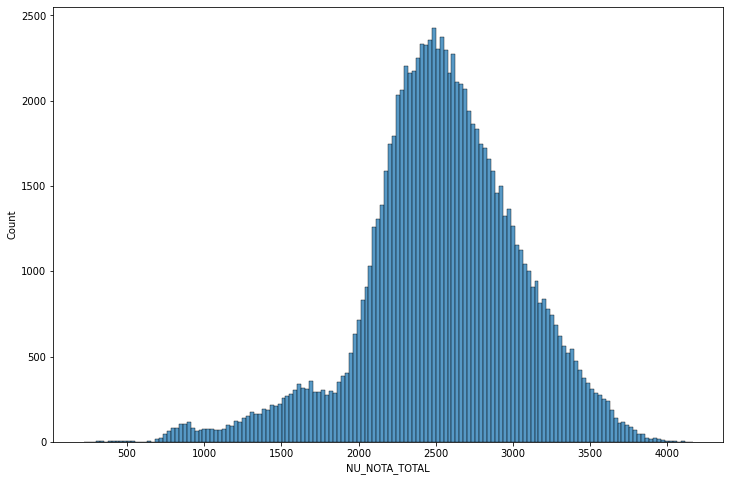

In [4]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_TOTAL")

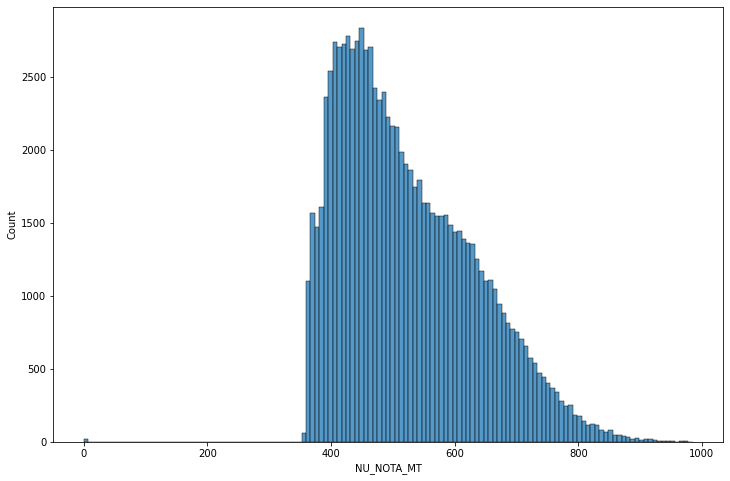

In [5]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_MT")

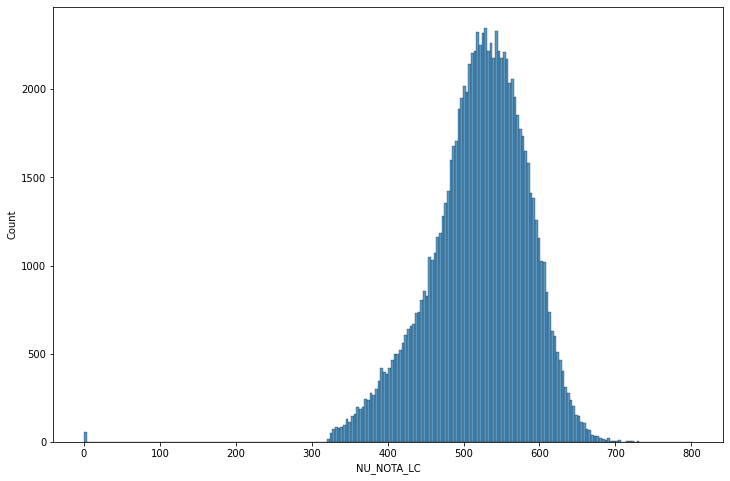

In [6]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_LC")

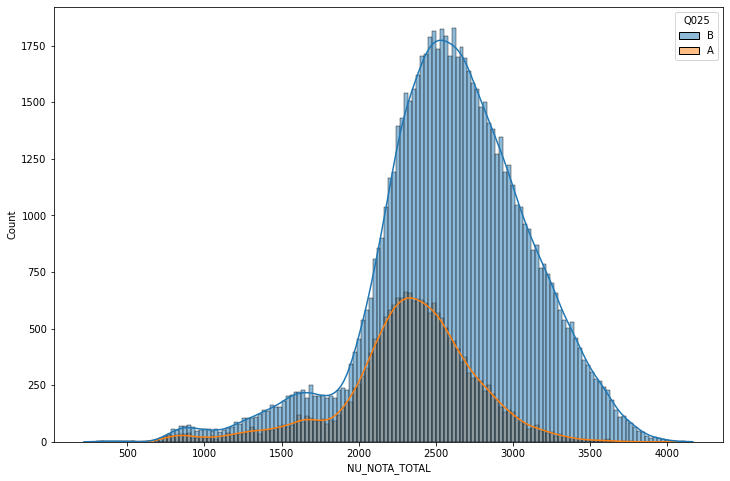

In [7]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True)

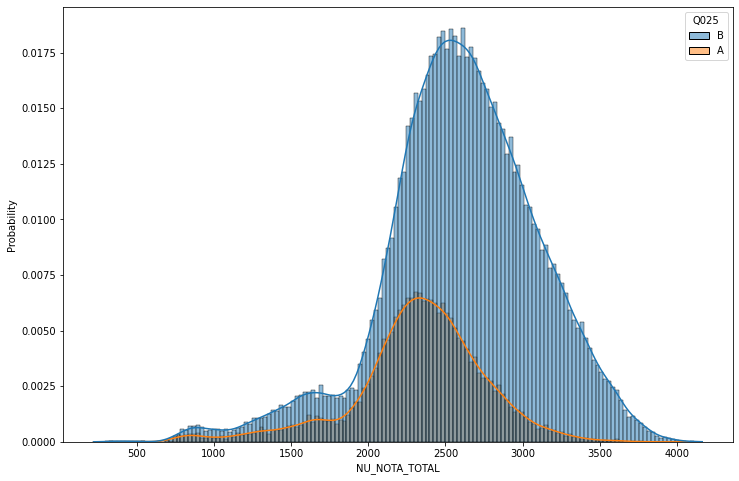

In [8]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat='probability')

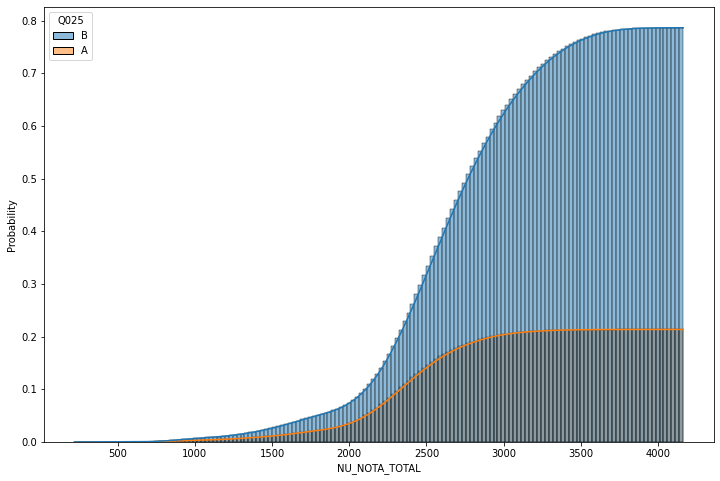

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_zero, x="NU_NOTA_TOTAL", hue="Q025", kde=True, stat='probability', cumulative=True)

(-50.0, 1050.0)

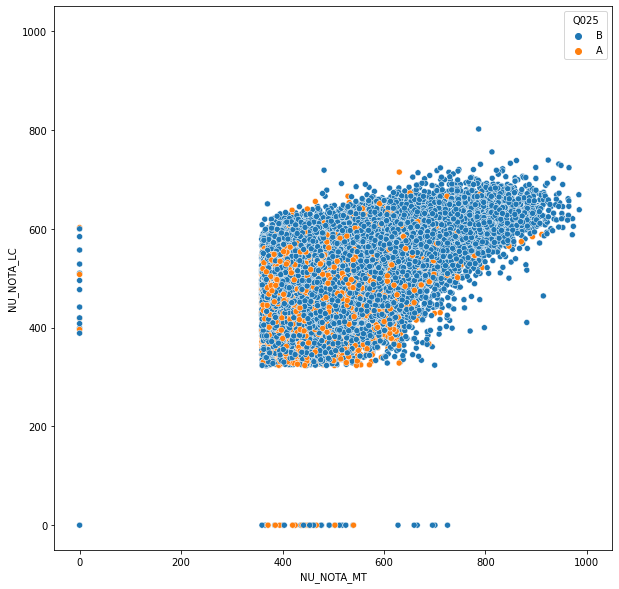

In [135]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_zero,x="NU_NOTA_MT",y="NU_NOTA_LC", hue='Q025')
plt.xlim((-50,1050))
plt.ylim((-50,1050))

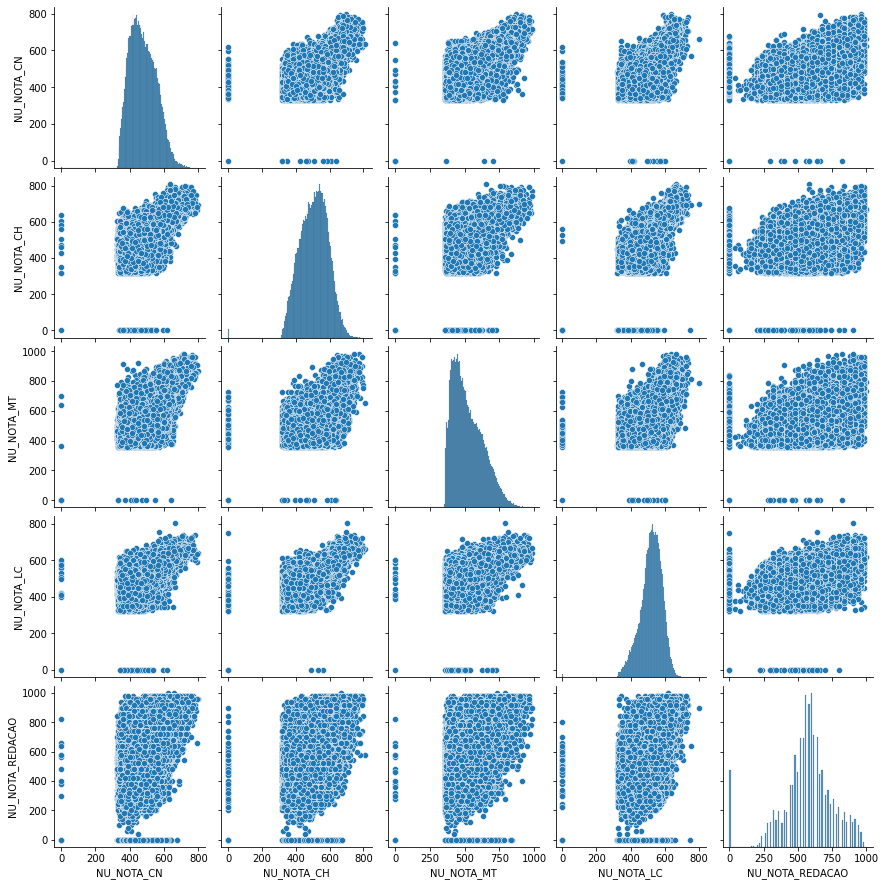

In [19]:
#provas_e_genero = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_LC','NU_NOTA_REDACAO','TP_SEXO']
sns.pairplot(data=dados_sem_zero[provas])

In [20]:
correlacao = dados_sem_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


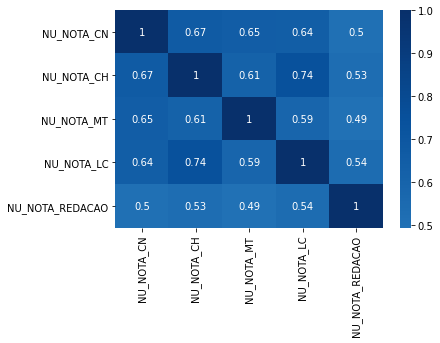

In [23]:
sns.heatmap(correlacao, cmap='Blues', center=0, annot= True)

## **DESAFIO 01 - Plotar as medias, medianas e moda das notas de LC e MT(matplotlib linha vertical)**

Text(0.2, 0.9, '0.0')

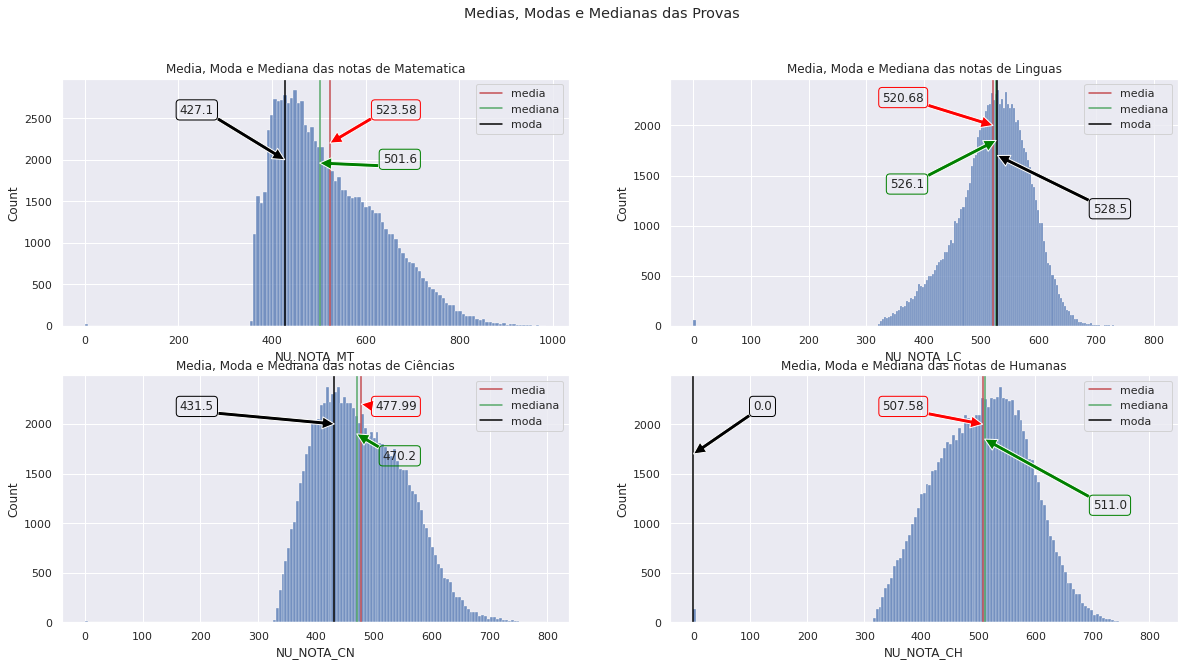

In [265]:
sns.set()
#---------------------------MATEMATICA-----------------------------#
media_MT = dados_sem_zero['NU_NOTA_MT'].mean()
mediana_MT = dados_sem_zero['NU_NOTA_MT'].median()
moda_MT = dados_sem_zero['NU_NOTA_MT'].mode()[0]


fig, axes = plt.subplots(2, 2, figsize=(20,10))
fig.suptitle('Medias, Modas e Medianas das Provas')
#plt.figure(figsize=(15,10))
#plt.subplot(2,2,1)
sns.histplot(dados_sem_zero,ax=axes[0][0], x="NU_NOTA_MT")
#plt.hist(dados_sem_zero, x="NU_NOTA_MT")
axes[0][0].axvline(media_MT, color='r')
axes[0][0].axvline(mediana_MT, color='g')
axes[0][0].axvline(moda_MT, color='black')
axes[0][0].legend(["media","mediana","moda"])
axes[0][0].set_title("Media, Moda e Mediana das notas de Matematica")

axes[0][0].annotate(round(media_MT,2), xy=(media_MT, 2200),xycoords='data',
                    xytext=(0.7,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='red'),
                    bbox=dict(boxstyle="round", fc="none", ec="red"),
                    horizontalalignment='right', verticalalignment='top')

axes[0][0].annotate(mediana_MT, xy=(mediana_MT, 1960), xycoords='data',
                    xytext=(0.7,0.7),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='green'),
                    bbox=dict(boxstyle="round", fc="none", ec="green"),
                    horizontalalignment='right', verticalalignment='top')
axes[0][0].annotate(moda_MT, xy=(moda_MT, 2000),xycoords='data',
                    xytext=(0.3,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='black'),
                    bbox=dict(boxstyle="round", fc="none", ec="black"),
                    horizontalalignment='right', verticalalignment='top')
#---------------------------LINGUAS------------------------------#
media_LC = dados_sem_zero['NU_NOTA_LC'].mean()
mediana_LC = dados_sem_zero['NU_NOTA_LC'].median()
moda_LC = dados_sem_zero['NU_NOTA_LC'].mode()[0]

sns.histplot(dados_sem_zero,ax=axes[0][1], x="NU_NOTA_LC")
axes[0][1].axvline(media_LC, color='r')
axes[0][1].axvline(mediana_LC, color='g')
axes[0][1].axvline(moda_LC, color='black')
axes[0][1].legend(["media","mediana","moda"])
axes[0][1].set_title("Media, Moda e Mediana das notas de Linguas")

axes[0][1].annotate(round(media_LC,2), xy=(media_LC, 2000),xycoords='data',
                    xytext=(0.5,0.95),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='red'),
                    bbox=dict(boxstyle="round", fc="none", ec="red"),
                    horizontalalignment='right', verticalalignment='top')

axes[0][1].annotate(mediana_LC, xy=(mediana_LC, 1850), xycoords='data',
                    xytext=(0.5,0.6),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='green'),
                    bbox=dict(boxstyle="round", fc="none", ec="green"),
                    horizontalalignment='right', verticalalignment='top')
axes[0][1].annotate(moda_LC, xy=(moda_LC, 1700),xycoords='data',
                    xytext=(0.9,0.5),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='black'),
                    bbox=dict(boxstyle="round", fc="none", ec="black"),
                    horizontalalignment='right', verticalalignment='top')

#------------------------CIENCIAS---------------------------------#
media_CN = dados_sem_zero['NU_NOTA_CN'].mean()
mediana_CN = dados_sem_zero['NU_NOTA_CN'].median()
moda_CN = dados_sem_zero['NU_NOTA_CN'].mode()[0]

sns.histplot(dados_sem_zero,ax=axes[1][0], x="NU_NOTA_CN")
axes[1][0].axvline(media_CN, color='r')
axes[1][0].axvline(mediana_CN, color='g')
axes[1][0].axvline(moda_CN, color='black')
axes[1][0].legend(["media","mediana","moda"])
axes[1][0].set_title("Media, Moda e Mediana das notas de Ciências")

axes[1][0].annotate(round(media_CN,2), xy=(media_CN, 2200),xycoords='data',
                    xytext=(0.7,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='red'),
                    bbox=dict(boxstyle="round", fc="none", ec="red"),
                    horizontalalignment='right', verticalalignment='top')

axes[1][0].annotate(mediana_CN, xy=(mediana_CN, 1900), xycoords='data',
                    xytext=(0.7,0.7),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='green'),
                    bbox=dict(boxstyle="round", fc="none", ec="green"),
                    horizontalalignment='right', verticalalignment='top')
axes[1][0].annotate(moda_CN, xy=(moda_CN, 2000),xycoords='data',
                    xytext=(0.3,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='black'),
                    bbox=dict(boxstyle="round", fc="none", ec="black"),
                    horizontalalignment='right', verticalalignment='top')
#-------------------------HUMANAS--------------------------------#
media_CH = dados_sem_zero['NU_NOTA_CH'].mean()
mediana_CH = dados_sem_zero['NU_NOTA_CH'].median()
moda_CH = dados_sem_zero['NU_NOTA_CH'].mode()[0]

sns.histplot(dados_sem_zero,ax=axes[1][1], x="NU_NOTA_CH")
axes[1][1].axvline(media_CH, color='r')
axes[1][1].axvline(mediana_CH, color='g')
axes[1][1].axvline(moda_CH, color='black')
axes[1][1].legend(["media","mediana","moda"])
axes[1][1].set_title("Media, Moda e Mediana das notas de Humanas")

axes[1][1].annotate(round(media_CH,2), xy=(media_CH, 2000),xycoords='data',
                    xytext=(0.5,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='red'),
                    bbox=dict(boxstyle="round", fc="none", ec="red"),
                    horizontalalignment='right', verticalalignment='top')

axes[1][1].annotate(mediana_CH, xy=(mediana_CH, 1850), xycoords='data',
                    xytext=(0.9,0.5),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='green'),
                    bbox=dict(boxstyle="round", fc="none", ec="green"),
                    horizontalalignment='right', verticalalignment='top')
axes[1][1].annotate(moda_CH, xy=(moda_CH, 1700),xycoords='data',
                    xytext=(0.2,0.9),textcoords='axes fraction',
                    arrowprops=dict( shrink=1,facecolor='black'),
                    bbox=dict(boxstyle="round", fc="none", ec="black"),
                    horizontalalignment='right', verticalalignment='top')

E interessante ver que, excluindo as pessoas que tiraram 0 no total por terem faltado a prova ou zerados todas, a moda para ciencias humanas continua dando 0 para essa amostra. Isso pode mostrar uma tendencia as pessoas irem mal na prova de humanas no geral ? Talvez, vale a pena analisar isso futuramente

In [148]:
#Verificando que a nota mais frequente em Ciencias Humanas é realmente 0, nessa amostra de dados são 135 provas zeradas (desconsiderando aqueles que
#por algum motivo não foram fazer a prova ou foram desclassificados)
dados_sem_zero['NU_NOTA_CH'].value_counts()

0.0      135
549.7     62
512.4     61
521.0     61
541.2     61
        ... 
755.0      1
742.2      1
316.4      1
716.9      1
760.4      1
Name: NU_NOTA_CH, Length: 4106, dtype: int64

## **DESAFIO 02 - CRIAR A DIAGONAL CORRELATION ENTRE AS NOTAS**

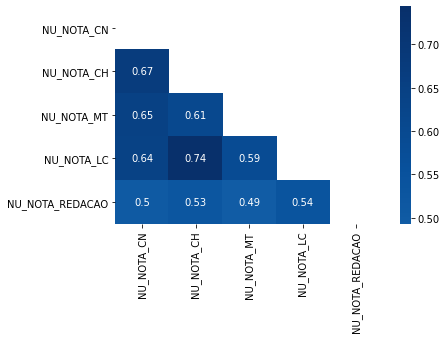

In [86]:
mask = np.triu(np.ones_like(correlacao,dtype=bool))
sns.heatmap(correlacao, mask=mask,cmap='Blues', center=0, annot= True)

## **DESAFIO 03 - Filtrar as notas por seu estuado ou sua cidade e refazer as analisaer verificando se são semalhantes ao geral**

Text(0.5, 50.09375, 'Correlações Brasil')

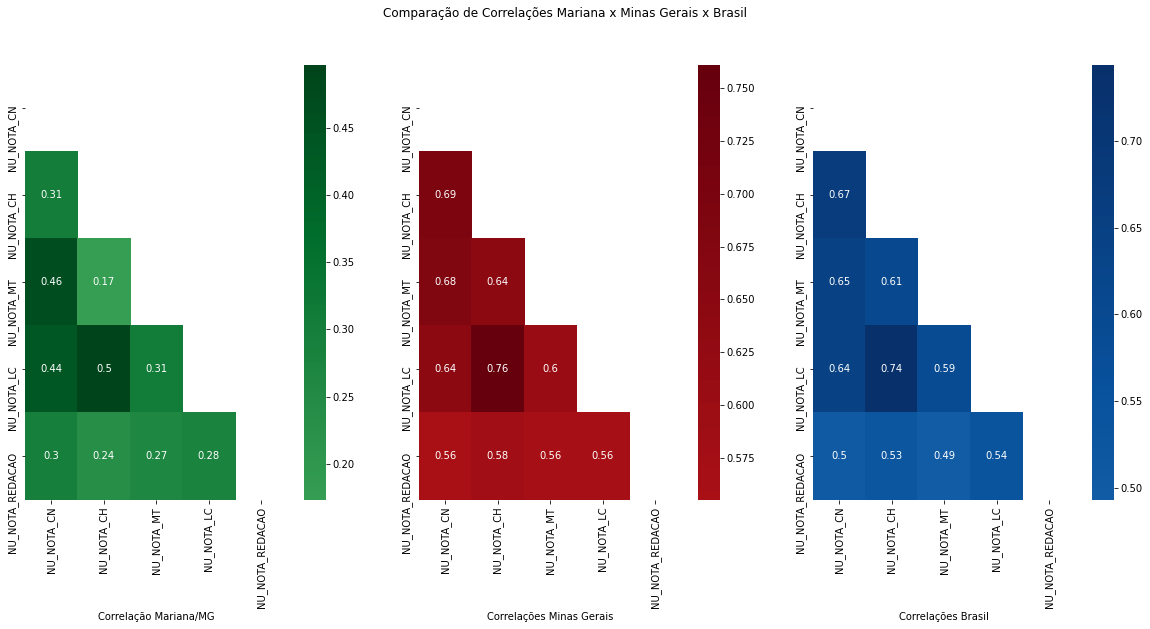

In [133]:
notas_mg = dados_sem_zero.query("SG_UF_RESIDENCIA =='MG'")
notas_mariana = dados_sem_zero.query("SG_UF_RESIDENCIA =='MG' and NO_MUNICIPIO_RESIDENCIA =='Mariana'")

correlacao_mg = notas_mg[provas].corr()
correlacao_mariana = notas_mariana[provas].corr()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8), sharex=True)
fig.suptitle('Comparação de Correlações Mariana x Minas Gerais x Brasil')
sns.heatmap(correlacao_mariana, ax=ax1, mask=mask,cmap='Greens', center=0, annot= True)
sns.heatmap(correlacao_mg, ax=ax2,mask=mask_mg,cmap='Reds', center=0, annot= True)
sns.heatmap(correlacao, ax=ax3, mask=mask,cmap='Blues', center=0, annot= True)

ax1.set_xlabel('Correlação Mariana/MG')
ax2.set_xlabel('Correlações Minas Gerais')
ax3.set_xlabel('Correlações Brasil')




Os niveis de correlação parecem se manter a nivel Estadual e Nacional, porem ao passar para um nivel municipal as correlações caem. Isso pode ser pelo fato da amostra ser pequena em relação ao estado/pais ou pode ser mesmo pela baixa correlação na minha cidade. Faria mais sentido analisar isso em um dataset maior e buscar por outros fatores.

## **DESAFIO 04 - Pensar sobre a correlação entre matematica e Lingua**

(-50.0, 1050.0)

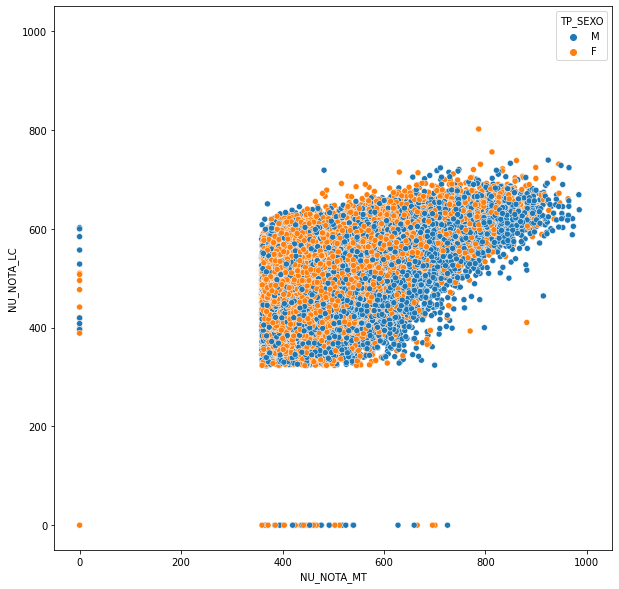

In [136]:
plt.figure(figsize=(10,10))
sns.scatterplot(data = dados_sem_zero,x="NU_NOTA_MT",y="NU_NOTA_LC", hue='TP_SEXO')
plt.xlim((-50,1050))
plt.ylim((-50,1050))

Acrecentei uma comparação entre as notas de homens e mulheres, porém não consigo tirar um conclusão tão clara como os instrutores. A principio eu diria que se a relação de homens e mulheres for proxima, as mulheres tendem a ter resultados melhores em ambas as provas do que homens. Pois como o Guilherme disse, os pontos laranjas formam algo mais proximo de uma "reta" do que os pontos azuis

Text(0.5, 0, 'Notas')

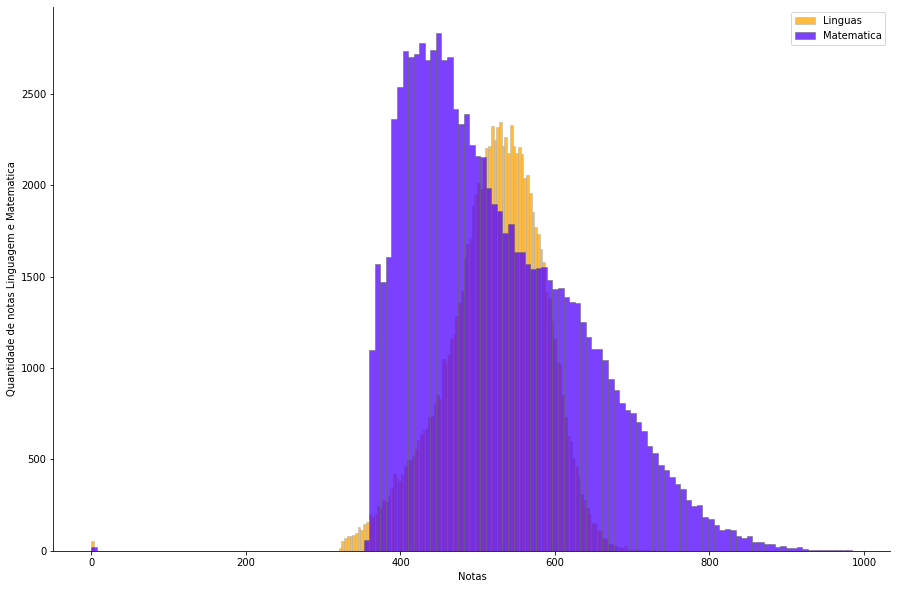

In [144]:
f, ax = plt.subplots(figsize=(15, 10))
sns.despine(f)

sns.histplot(data = dados_sem_zero, x="NU_NOTA_LC",
    multiple="stack",color = '#ffa500',
    edgecolor=".7",
    linewidth=.5, label = "Linguas"
)

sns.histplot(data = dados_sem_zero, x="NU_NOTA_MT",
    multiple="stack", color ='#5001ff',
    edgecolor=".4",
    linewidth=.5, label = "Matematica"
)

ax.legend()

plt.ylabel('Quantidade de notas Linguagem e Matematica')
plt.xlabel('Notas')